# Bank Series

We will propose a relevant and exhaustive market risk analysis of a Bank. The bank is **JP Morgan**

## Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set(rc={"figure.figsize":(15, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Donwload the data

In [3]:
ticker = 'JPM'
prices = sf.get_data(ticker)

We compute the returns

In [11]:
returns = sf.get_returns(prices)

In [5]:
returns.mean()

0.000699927600576113

We plot the returns for the bank

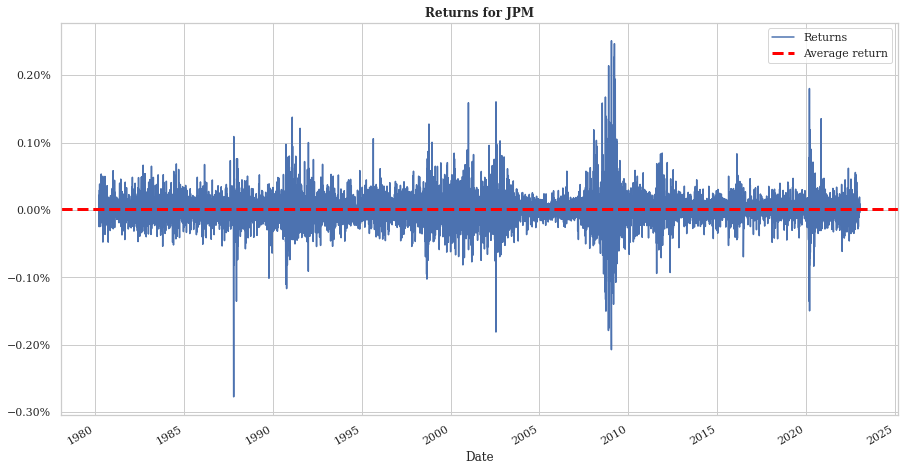

In [34]:
sf.plot_returns(returns, ticker)

## Estimation of the VaR

Qu'est ce que la **VaR** : Une mesure de la perte maximale potentielle sur une période de temps donnée avec une certaine probabilité.

### Non parametric method

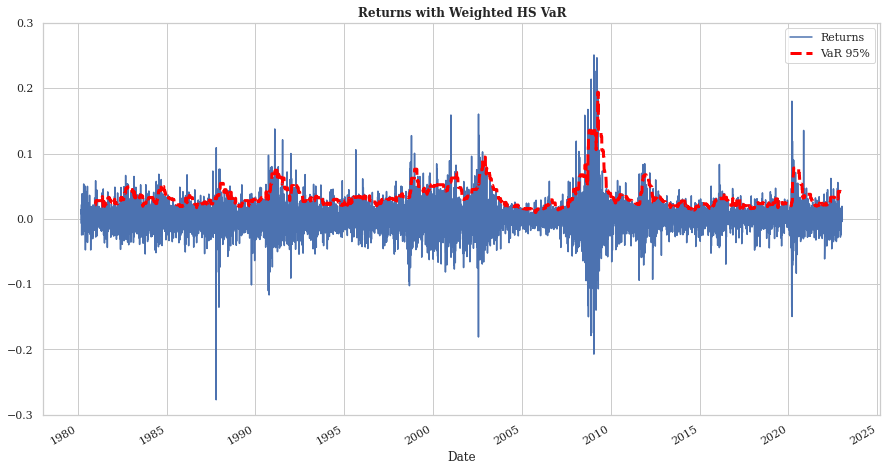

In [33]:
VaR_NonParam = sf.weighted_hs_var(returns=returns, confidence_level=95, window=100)

### Parametric method

In [20]:
VaR_NonParam.iloc[300:330]

Date
1981-10-15 00:00:00-04:00        0.03
1981-10-16 00:00:00-04:00        0.03
1981-10-19 00:00:00-04:00        0.03
1981-10-20 00:00:00-04:00        0.03
1981-10-21 00:00:00-04:00        0.03
1981-10-22 00:00:00-04:00        0.03
1981-10-23 00:00:00-04:00        0.03
1981-10-26 00:00:00-05:00        0.03
1981-10-27 00:00:00-05:00        0.03
1981-10-28 00:00:00-05:00        0.03
1981-10-29 00:00:00-05:00        0.03
1981-10-30 00:00:00-05:00        0.03
1981-11-02 00:00:00-05:00    0.027272
1981-11-03 00:00:00-05:00    0.027272
1981-11-04 00:00:00-05:00    0.027272
1981-11-05 00:00:00-05:00    0.027272
1981-11-06 00:00:00-05:00    0.027272
1981-11-09 00:00:00-05:00    0.027272
1981-11-10 00:00:00-05:00    0.027272
1981-11-11 00:00:00-05:00    0.027272
1981-11-12 00:00:00-05:00    0.027272
1981-11-13 00:00:00-05:00    0.027272
1981-11-16 00:00:00-05:00    0.027272
1981-11-17 00:00:00-05:00    0.027272
1981-11-18 00:00:00-05:00    0.027272
1981-11-19 00:00:00-05:00    0.027272
1981-11